<a href="https://colab.research.google.com/github/NguyenKimLong-20146222/Homework_Week5_FuzzyLogic/blob/main/Adaptive_Food_Suggestion_Fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=fe667266b3a2f73eec778c4635bf3897f5d4006f90edf93f2c11965634d0e42d
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


4.002041151242105


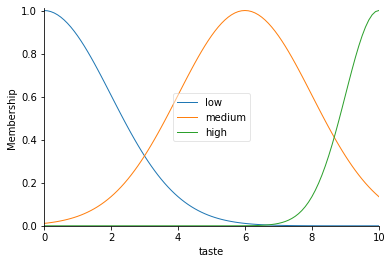

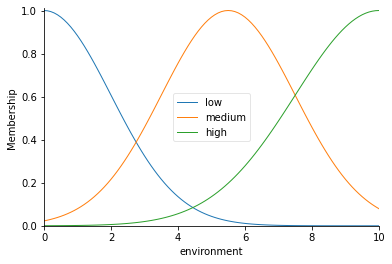

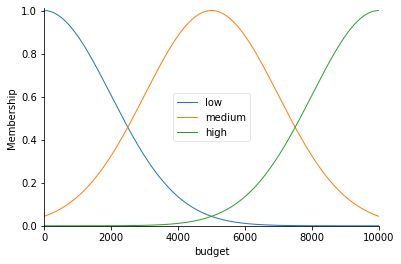

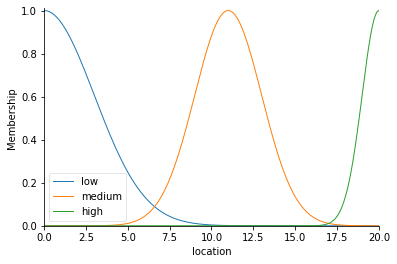

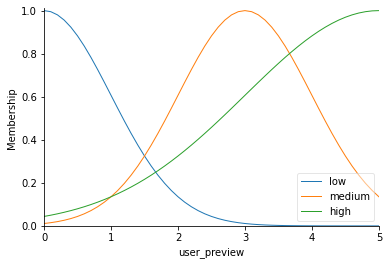

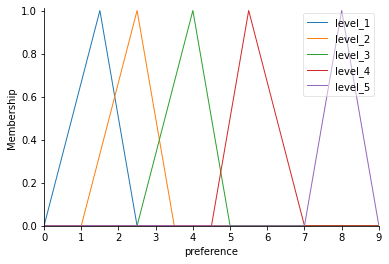

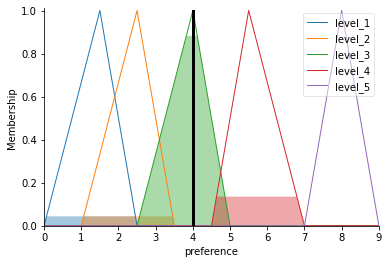

In [7]:
#OSMAN2016
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

taste = ctrl.Antecedent(np.arange(0,10.1,0.1),'taste')
environment = ctrl.Antecedent(np.arange(0,10.1,0.1),'environment')
budget = ctrl.Antecedent(np.arange(0,10001,1),'budget')
location = ctrl.Antecedent(np.arange(0,20.1,0.1),'location')
user_preview = ctrl.Antecedent(np.arange(0,5.1,0.1),'user_preview')
preference = ctrl.Consequent(np.arange(0,9.1,0.1),'preference')

taste['low']=fuzz.gaussmf(taste.universe,0,2)
taste['medium']=fuzz.gaussmf(taste.universe,6,2)
taste['high']=fuzz.gaussmf(taste.universe,10,1)

environment['low']=fuzz.gaussmf(environment.universe,0,2)
environment['medium']=fuzz.gaussmf(environment.universe,5.5,2)
environment['high']=fuzz.gaussmf(environment.universe,10,2.5)

budget['low']=fuzz.gaussmf(budget.universe,0,2000)
budget['medium']=fuzz.gaussmf(budget.universe,5000,2000)
budget['high']=fuzz.gaussmf(budget.universe,10000,2000)

location['low']=fuzz.gaussmf(location.universe,0,3)
location['medium']=fuzz.gaussmf(location.universe,11,2)
location['high']=fuzz.gaussmf(location.universe,20,1)

user_preview['low']=fuzz.gaussmf(user_preview.universe,0,1)
user_preview['medium']=fuzz.gaussmf(user_preview.universe,3,1)
user_preview['high']=fuzz.gaussmf(user_preview.universe,5,2)

preference['level_1']=fuzz.trimf(preference.universe,[0,1.5,2.5])
preference['level_2']=fuzz.trimf(preference.universe,[1,2.5,3.5])
preference['level_3']=fuzz.trimf(preference.universe,[2.5,4,5])
preference['level_4']=fuzz.trimf(preference.universe,[4.5,5.5,7])
preference['level_5']=fuzz.trimf(preference.universe,[7,8,9])

taste.view()
environment.view()
budget.view()
location.view()
user_preview.view()
preference.view()

rule = []
index = ['low','medium','high']
level = ['level_1','level_2','level_3','level_4','level_5']
count = 0
for a in index:
  for b in index:
    for c in index:
      for d in index:
        for e in index:
          rule.append(ctrl.Rule(taste[a]&environment[b]&budget[c]&location[d]&user_preview[e],preference[level[count]]))
          if (a=='low') and (b=='low') and (c=='medium'): count = 1
          if (a=='low') and (b=='medium') and (c=='medium'): count = 2
          if (a=='medium') and (b=='high') and (c=='medium'): count = 3
          if (a=='high') and (b=='high') and (c=='medium'): count = 4

preference_control =ctrl.ControlSystem(rule[ : ])
preferencing = ctrl.ControlSystemSimulation(preference_control)
preferencing.input['taste'] = 5
preferencing.input['environment'] = 5
preferencing.input['budget'] = 1000
preferencing.input['location'] = 10
preferencing.input['user_preview'] = 5
preferencing.compute()
print(preferencing.output['preference'])
preference.view(sim = preferencing )

